Primero guardo la imagen NDVI

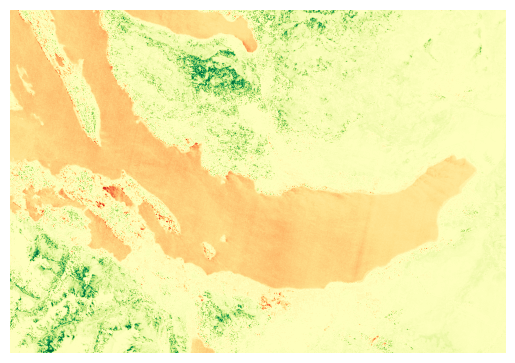

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el NDVI
def calculate_ndvi(nir_band, red_band):
    ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)
    return ndvi

# Cargar las bandas necesarias
red_band = cv2.imread('bariloche2/B1.tif', cv2.IMREAD_GRAYSCALE)
nir_band = cv2.imread('bariloche2/B2.tif', cv2.IMREAD_GRAYSCALE)

# Asegurarse de que las bandas tengan el mismo tamaño
if red_band.shape != nir_band.shape:
    raise ValueError("Las bandas deben tener el mismo tamaño.")

# Calcular el NDVI
ndvi = calculate_ndvi(nir_band.astype(float), red_band.astype(float))

# Mostrar y guardar la imagen de NDVI sin título
plt.imshow(ndvi, cmap='RdYlGn')
plt.axis('off')

# Guardar la imagen de NDVI sin título
plt.savefig('output/NDVI.tif', bbox_inches='tight', pad_inches=0, dpi=300, format='tiff')

# Mostrar la imagen en Jupyter
plt.show()


Luego correr el create_dataset (aparte, no está en este código)


In [8]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from PIL import Image

# Rutas a los directorios
directories = {
    "mountain": "areas_NVDI/mountain",
    "city": "areas_NVDI/city",
    "water": "areas_NVDI/water"
}

# Cargar y procesar imágenes
data = []
labels = []

def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        if filename.endswith(".tif"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert("L")  # Convertir a escala de grises
            img = img.resize((64, 64))  # Redimensionar a 64x64 píxeles para simplificar
            img_array = np.array(img).flatten()  # Convertir la imagen a un vector
            data.append(img_array)
            labels.append(label)

# Cargar imágenes de cada directorio
for label, folder in directories.items():
    load_images_from_folder(folder, label)

# Convertir datos y etiquetas a arrays numpy
data = np.array(data)
labels = np.array(labels)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Entrenar modelo SVM
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar modelo
y_pred = svm_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predecir la clase de la nueva imagen
new_image_path = "output/NDVI.tif"
new_img = Image.open(new_image_path).convert("L")
new_img = new_img.resize((64, 64))
new_img_array = np.array(new_img).flatten().reshape(1, -1)

prediction = svm_model.predict(new_img_array)
print("Predicted class for NDVI.tif:", prediction[0])


Classification Report:
               precision    recall  f1-score   support

        city       1.00      1.00      1.00         2
    mountain       0.00      0.00      0.00         3
       water       0.40      1.00      0.57         2

    accuracy                           0.57         7
   macro avg       0.47      0.67      0.52         7
weighted avg       0.40      0.57      0.45         7

Predicted class for NDVI.tif: water


/home/matias/anaconda3/envs/image-analysis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/matias/anaconda3/envs/image-analysis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/matias/anaconda3/envs/image-analysis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Comparando con el ejercicio 16 nos dió el mismo resultado pero eso es porque el dataset es chico. Estimamos que este modelo funcionaría mejor al entrar con imágenes en NDVI